# RooFit 101
**Author:** Stephan Hageboeck (CERN)
Here we demonstrate some basic RooFit functionality from building a fit model over generating toy data to fitting.

## Model building
Set up a Gaussian distribution. We need three variables for the observable and the parameters.

In [2]:
RooRealVar x("x", "Observable", 0., 10.);
RooRealVar mean("mean", "Mean of Gaussian", 0., 10.);
RooRealVar sigma("sigma", "Width of Gaussian", 0.1, 5.);

RooGaussian gaus("gaus", "Gaussian distribution", x, mean, sigma);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



If we print `gaus` in tree mode, we see that it's connected to the three variables we defined above. Also note that there's a big difference between the values we get with and without normalisation over the range of `x`. 

In [4]:
gaus.Print("T");
std::cout << "Unnormalised: " << gaus.getVal() << "\tnormalised: " << gaus.getVal(x) << "\n";

0x7f883c5d3b88 RooGaussian::gaus = 1/6.07292 [Auto,Clean] 
  0x7f883c5d3000/V- RooRealVar::x = 5
  0x7f883c5d33d8/V- RooRealVar::mean = 5
  0x7f883c5d37b0/V- RooRealVar::sigma = 2.55
Unnormalised: 1	normalised: 0.164665


If we change the value of `x` or the parameters, the Gaussian changes as well. Note how RooFit also prints the last normalisation constant that had been computed.

In [6]:
x = 2.;
gaus.Print("T");

0x7f883c5d3b88 RooGaussian::gaus = 0.500553/6.07292 [Auto,Dirty] 
  0x7f883c5d3000/V- RooRealVar::x = 2
  0x7f883c5d33d8/V- RooRealVar::mean = 5
  0x7f883c5d37b0/V- RooRealVar::sigma = 2.55


## Plotting
In order to plot anything in RooFit, we have to provide a frame, which decides in which variable we want the plot.
Change the parameters and plot a second time if you feel like it.

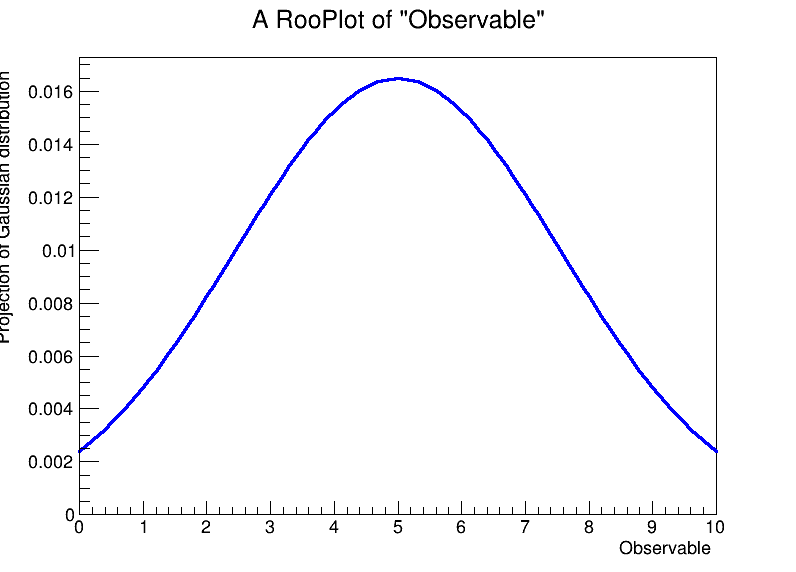

In [7]:
auto c = new TCanvas("plot", "Plot Gaussian", 800, 600);

auto frame = x.frame();
gaus.plotOn(frame);

frame->Draw();
c->Draw();

## Fitting
For most applications, `pdf.fitTo(data)` is good enough. There's a lot of ways to customise the fits, though. [Check the documentation](https://root.cern.ch/doc/master/classRooAbsPdf.html#a5f79f16f4a26a19c9e66fb5c080f59c5).

Let's quickly generate some toy data we can fit.

In [3]:
auto gaussData = gaus.generate(x, 1000);
gaus.fitTo(*gaussData);

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         5.00000e+00  1.00000e+00    0.00000e+00  1.00000e+01
     2 sigma        2.55000e+00  4.90000e-01    1.00000e-01  5.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=2192.14 FROM MIGRAD    STATUS=INITIATE        8 CALLS           9 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ER

## Plotting data and fitted function.
When plotting data and function, make sure to always plot the data first. Why? RooFit will automatically scale the (normalised) PDF to match the number of data events. You can also show the post-fit parameters on the plot frame.

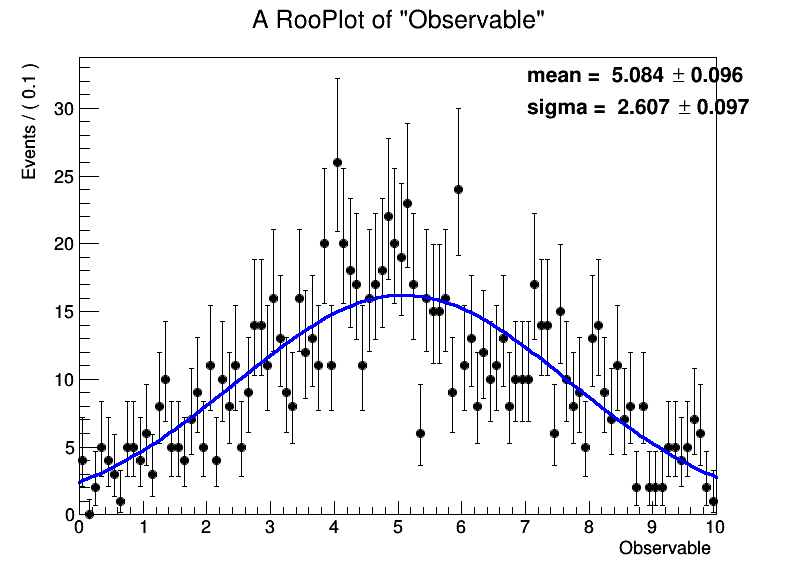

[#0] WARNING:Plotting -- Cannot apply a bin width correction and use Poisson errors. Not correcting for bin width.


In [4]:
auto c2 = new TCanvas("plot2", "Plot Gaussian", 800, 600);
auto frame2 = x.frame();

gaussData->plotOn(frame2);
gaus.plotOn(frame2);
gaus.paramOn(frame2);

frame2->Draw();
c2->Draw();